In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn import preprocessing
preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc , roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df = pd.read_csv('/content/breast-cancer.csv')

In [3]:
#Visualizate frist columns
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#droping rows of duplicate id
df = df.drop_duplicates('id', keep='last')

In [5]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
df.shape

(569, 32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Checking for missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
#Making the replacement of the categorical variables
df['diagnosis']= df['diagnosis'].map({'M':0, 'B': 1})

In [10]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df=df.dropna(axis=1)

In [12]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 10)

In [14]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train.shape

(455, 31)

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

knn_class_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(knn_class_rep)

0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.97      1.00      0.99        75

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



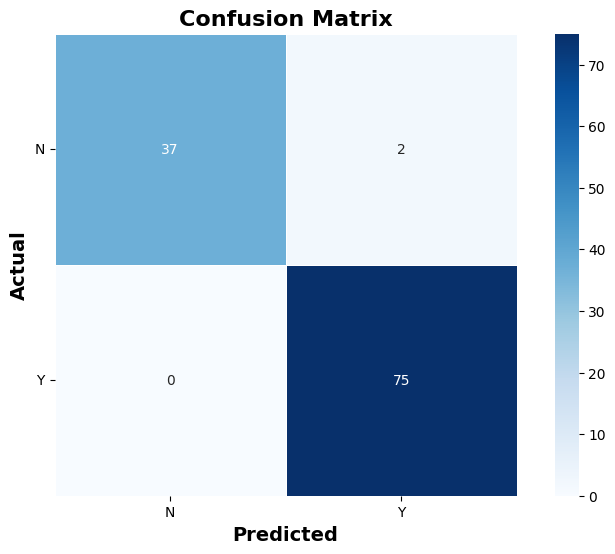

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 6))


sns.heatmap(
    cm, annot=True, fmt='d', cmap= 'Blues', linewidths=0.4, square=True, cbar=True,
    xticklabels=["N", "Y"],
    yticklabels=["N", "Y"]
)

plt.xlabel('Predicted', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=14, fontweight='bold')
plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
plt.yticks(rotation=360)

plt.show()

In [18]:
columnsName=df.drop(labels= 'diagnosis', axis= 1).columns.values.tolist()

In [19]:
print(columnsName)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [20]:
def accuracy(x):
  X = df[x]
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)
  model = KNeighborsClassifier()
  model.fit(X_train, y_train)
  acc= model.score(X_test, y_test)
  print("acc = ",acc)
  return acc

In [21]:
columnsName1=[0,1]
chromosomes=[]
for i in range(10):
  chro1=[]
  for i in range(31):
    item = random.choice(tuple(columnsName1))
    chro1.append(item)
  chromosomes.append(chro1)

In [22]:
def data(chromosomes1):
  chromosomes2=[]
  for i in range(len(chromosomes1)):
    if chromosomes1[i]==1:
      chromosomes2.append(columnsName[i])
  return chromosomes2

In [23]:
pb = []
def checkpersonalnest():
  for i in range(len(chromosomes)):
    pb.append(accuracy(data(chromosomes[i])))
checkpersonalnest()

acc =  0.9239766081871345
acc =  0.9122807017543859
acc =  0.8245614035087719
acc =  0.7309941520467836
acc =  0.9415204678362573
acc =  0.7719298245614035
acc =  0.7017543859649122
acc =  0.9064327485380117
acc =  0.8888888888888888
acc =  0.8830409356725146


In [24]:

def checkvelocity(globalbest):
    velocity=[]
    for j in range(len(chromosomes)):
        velocity.append(list(0+1*(np.random.random(1)[0])*(np.array(chromosomes[j])-np.array(chromosomes[j]))+1*(np.random.random(1)[0])*(np.array(globalbest)-np.array(chromosomes[j]))))
    #print(velocity)
    return velocity

In [25]:
def addingchromosomes(velocity):
    chromosomes2=[]
    for i in range(len(velocity)):
        nextchromo=[]
        for j in range(len(velocity[i])):
            nextchromo.append(chromosomes[i][j]+velocity[i][j])
        chromosomes2.append(nextchromo)
    return chromosomes2

In [26]:
def normalize(chromosomes2):
  for l in range(len(chromosomes2)):
    for m in range(len(chromosomes2[l])):
      if chromosomes2[l][m]>0.5:
        chromosomes2[l][m]=1
      else:
        chromosomes2[l][m]=0
  return chromosomes2

In [27]:
def checkpd(chromosomes2):
  personal=[]
  for i in range(len(chromosomes2)):
    personal.append(accuracy(data(chromosomes2[i])))
    for j in range(len(personal)):
      if(personal[j]>pb[j]):
        chromosomes[j]=chromosomes2[j]
        pb[j]=personal[j]
  return personal

In [28]:
max(pb)
ind = pb.index(max(pb))
globalbest=chromosomes[ind]
for i in range(20):
    chromosomes2=[]
    personal=[]
    velocity=checkvelocity(globalbest)
    chromosomes2=addingchromosomes(velocity)
    chromosomes2=normalize(chromosomes2)
    personal=checkpd(chromosomes2)
    globalbest=[]
    max(pb)
    ind = pb.index(max(pb))
    globalbest=chromosomes[ind]


acc =  0.9064327485380117
acc =  0.9239766081871345
acc =  0.9298245614035088
acc =  0.9122807017543859
acc =  0.9181286549707602
acc =  0.9590643274853801
acc =  0.6081871345029239
acc =  0.9239766081871345
acc =  0.9181286549707602
acc =  0.8771929824561403
acc =  0.9181286549707602
acc =  0.9239766081871345
acc =  0.9064327485380117
acc =  0.9298245614035088
acc =  0.9122807017543859
acc =  0.9122807017543859
acc =  0.9298245614035088
acc =  0.9415204678362573
acc =  0.9473684210526315
acc =  0.9298245614035088
acc =  0.9298245614035088
acc =  0.9298245614035088
acc =  0.9415204678362573
acc =  0.935672514619883
acc =  0.9239766081871345
acc =  0.9415204678362573
acc =  0.9064327485380117
acc =  0.9122807017543859
acc =  0.9181286549707602
acc =  0.935672514619883
acc =  0.9473684210526315
acc =  0.9239766081871345
acc =  0.9298245614035088
acc =  0.9415204678362573
acc =  0.9298245614035088
acc =  0.9532163742690059
acc =  0.9590643274853801
acc =  0.9005847953216374
acc =  0.91812

In [29]:
max(pb)

0.9649122807017544

In [30]:
ind = pb.index(max(pb))
print(ind)
globalbest=chromosomes[ind]

2


In [31]:
print(data(globalbest))

['texture_mean', 'area_mean', 'smoothness_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [32]:
globalbest = data(globalbest)

In [33]:
x = df[globalbest]

In [34]:
x

,texture_mean,area_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,radius_worst,texture_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,10.38,1001.0,0.11840,0.14710,0.2419,0.07871,153.40,0.006399,0.04904,0.05373,0.01587,25.380,17.33,184.60,2019.0,0.66560,0.7119,0.2654,0.4601
1,17.77,1326.0,0.08474,0.07017,0.1812,0.05667,74.08,0.005225,0.01308,0.01860,0.01340,24.990,23.41,158.80,1956.0,0.18660,0.2416,0.1860,0.2750
2,21.25,1203.0,0.10960,0.12790,0.2069,0.05999,94.03,0.006150,0.04006,0.03832,0.02058,23.570,25.53,152.50,1709.0,0.42450,0.4504,0.2430,0.3613
3,20.38,386.1,0.14250,0.10520,0.2597,0.09744,27.23,0.009110,0.07458,0.05661,0.01867,14.910,26.50,98.87,567.7,0.86630,0.6869,0.2575,0.6638
4,14.34,1297.0,0.10030,0.10430,0.1809,0.05883,94.44,0.011490,0.02461,0.05688,0.01885,22.540,16.67,152.20,1575.0,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,22.39,1479.0,0.11100,0.13890,0.1726,0.05623,158.70,0.010300,0.02891,0.05198,0.02454,25.450,26.40,166.10,2027.0,0.21130,0.4107,0.2216,0.2060
565,28.25,1261.0,0.09780,0.09791,0.1752,0.05533,99.04,0.005769,0.02423,0.03950,0.01678,23.690,38.25,155.00,1731.0,0.19220,0.3215,0.1628,0.2572
566,28.08,858.1,0.08455,0.05302,0.1590,0.05648,48.55,0.005903,0.03731,0.04730,0.01557,18.980,34.12,126.70,1124.0,0.30940,0.3403,0.1418,0.2218
567,29.33,1265.0,0.11780,0.15200,0.2397,0.07016,86.22,0.006522,0.06158,0.07117,0.01664,25.740,39.42,184.60,1821.0,0.86810,0.9387,0.2650,0.4087


In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 10)

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

knn_class_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
print(knn_class_rep)

0.9210526315789473
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        39
           1       0.93      0.95      0.94        75

    accuracy                           0.92       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



In [52]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

class PSO:
    def __init__(self, num_particles, max_iterations, dimension, X_train, X_test, y_train, y_test, model_class):
        self.num_particles = num_particles
        self.max_iterations = max_iterations
        self.dimension = dimension
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test
        self.model_class = model_class

        # Hyperparameters
        self.w = 0.5  # Inertia weight
        self.c1 = 2    # Cognitive coefficient
        self.c2 = 2    # Social coefficient

        # Initialize particles
        self.particles_position = np.random.uniform(low=1, high=20, size=(self.num_particles, self.dimension))
        self.particles_velocity = np.zeros((self.num_particles, self.dimension))
        self.pbest_position = self.particles_position  # Personal best position
        self.pbest_value = np.full(self.num_particles, -np.inf)  # Personal best value (maximization)
        self.gbest_position = None  # Global best position
        self.gbest_value = -np.inf  # Global best value (maximization)
        self.best_accuracy = -np.inf  # Best accuracy
        self.best_solution = None  # Best solution

    def optimize(self):
        for i in range(self.max_iterations):
            # Evaluate fitness for each particle
            for j in range(self.num_particles):
                accuracy = self._evaluate_accuracy(self.particles_position[j])

                # Update personal best
                if accuracy > self.pbest_value[j]:
                    self.pbest_value[j] = accuracy
                    self.pbest_position[j] = self.particles_position[j]

                # Update global best
                if accuracy > self.gbest_value:
                    self.gbest_value = accuracy
                    self.gbest_position = self.particles_position[j]
                    self.best_solution = self.gbest_position.copy()  # Store the best solution
                    self.best_accuracy = self.gbest_value  # Store the best accuracy

            # Update particle velocity and position
            for j in range(self.num_particles):
                r1 = np.random.rand(self.dimension)  # Random numbers
                r2 = np.random.rand(self.dimension)

                cognitive_component = self.c1 * r1 * (self.pbest_position[j] - self.particles_position[j])
                social_component = self.c2 * r2 * (self.gbest_position - self.particles_position[j])

                # Update velocity
                self.particles_velocity[j] = self.w * self.particles_velocity[j] + cognitive_component + social_component

                # Update position
                self.particles_position[j] = self.particles_position[j] + self.particles_velocity[j]

        return self.best_solution, self.best_accuracy

    def _evaluate_accuracy(self, position):
        # Assuming the first dimension represents the hyperparameter value (e.g., k for KNN)
        hyperparameter_value = int(position[0])
        if hyperparameter_value < 1:
            hyperparameter_value = 1  # Set a minimum value for the hyperparameter

        model = self.model_class(n_neighbors=hyperparameter_value)  # Instantiate model with the hyperparameter value
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        return accuracy_score(self.y_test, y_pred)

# Example usage
X = np.random.rand(100, 2)  # Sample data
y = np.random.randint(0, 2, 100)  # Sample labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

pso = PSO(num_particles=100, max_iterations=200, dimension=1, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, model_class=KNeighborsClassifier)
best_solution, best_accuracy = pso.optimize()
print("Best solution (hyperparameter value):", best_solution)
print("Best accuracy:", best_accuracy)

Best solution (hyperparameter value): [7.10590518]
Best accuracy: 0.6


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def evaluate_knn_accuracy(X_train, X_test, y_train, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Example usage
X = np.random.rand(100, 2)  # Sample data
y = np.random.randint(0, 2, 100)  # Sample labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

k = 5  # Example hyperparameter value
accuracy = evaluate_knn_accuracy(X_train, X_test, y_train, y_test, k)
print("Accuracy:", accuracy)


Accuracy: 0.5333333333333333
